In [87]:
#create a dataframe from a file using pandas
file = '../Resources/WorldHappinessReport.csv'
# The correct encoding must be used to read the CSV in pandas
RawData = pd.read_csv(file)
WHR_DF=RawData.loc[RawData["year"]==2017,:]
WHR_DF.head(1)

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
9,Afghanistan,2017,2.661718,7.460144,0.49088,52.339527,0.427011,-0.10634,0.954393,0.496349,0.371326,0.261179,NaN,NaN,1.454051,0.546283,NaN,NaN,0.286599


In [88]:
#dependencies
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt

In [89]:
RawSpotifyData = pd.read_csv('../Outputs/SpotifyWithFeaturesFinal.csv')
CountryCodeRaw = pd.read_csv('../Resources/CountryCodesLookup.csv', encoding="ISO-8859-1")
CountryCodeRaw["region"]=CountryCodeRaw["A2 (ISO)"].str.lower()
CountryCodeRaw["country"]=CountryCodeRaw["COUNTRY"]
#Find CountryName from spotifyData Using the countryLookup file
SpotifyDF=pd.merge(RawSpotifyData,CountryCodeRaw, on="region", how='inner',suffixes=("","") )

SpotifyDF.head(1)



,Position,Track Name,Artist,Streams,date,region,id,uri,happiness,energy,...,loudness,speechiness,instrumentalness,COUNTRY,A2 (ISO),A3 (UN),NUM (UN),DIALING CODE,spotifyFlag,country
0,7,Back to You (feat. Bebe Rexha & Digital Farm A...,Louis Tomlinson,5154,9/1/2017,th,7F9vK8hNFMml4GtHsaXui6,spotify:track:7F9vK8hNFMml4GtHsaXui6,0.645,0.53,...,-4.918,0.142,0.0,Thailand,TH,THA,764,66,1,Thailand


In [90]:
GroupByDF=RawSpotifyData.groupby(['region'])
MusicProfileRaw=GroupByDF.mean()

#Find CountryName from spotifyData Using the countryLookup file
MusicProfileDF=pd.merge(MusicProfileRaw,CountryCodeRaw, on="region", how='inner',suffixes=("","") )
MusicProfileDF.head(1)

,region,Position,Streams,happiness,energy,danceability,loudness,speechiness,instrumentalness,COUNTRY,A2 (ISO),A3 (UN),NUM (UN),DIALING CODE,spotifyFlag,country
0,ar,100.5,38207.915833,0.626648,0.723108,0.698322,-5.17968,0.091372,0.002521,Argentina,AR,ARG,32,54,1,Argentina


In [91]:
#merge with Happiness report
MusicHappinessDF=pd.merge(MusicProfileDF,WHR_DF,on='country', how='inner',suffixes=("","")  )
len(MusicHappinessRaw)

52

In [92]:
MusicHappinessDF.columns

Index(['region', 'Position', 'Streams', 'happiness', 'energy', 'danceability',
       'loudness', 'speechiness', 'instrumentalness', 'COUNTRY', 'A2 (ISO)',
       'A3 (UN)', 'NUM (UN)', 'DIALING CODE', 'spotifyFlag', 'country', 'year',
       'Life Ladder', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect', 'Confidence in national government',
       'Democratic Quality', 'Delivery Quality',
       'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-15',
       'gini of household income reported in Gallup, by wp5-year'],
      dtype='object')

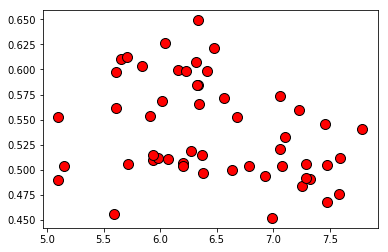

In [93]:
fig,    ax = plt.subplots() 
ax.errorbar(MusicHappinessDF['Life Ladder'], MusicHappinessDF["happiness"],  fmt="o",color= 'r'
               ,linewidth=0, markeredgecolor='black',markeredgewidth=1,markersize=10,label='label')

plt.xlabel('Happiness Index')
plt.ylabel('Music Happiness')
plt.title("How Happy is the music of choice vs the coutnry happiness")
plt.show()




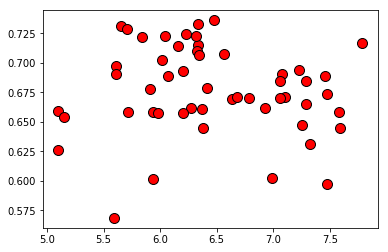

In [94]:
fig,    ax = plt.subplots() 
ax.errorbar(MusicHappinessDF['Life Ladder'], MusicHappinessDF["energy"],  fmt="o",color= 'r'
               ,linewidth=0, markeredgecolor='black',markeredgewidth=1,markersize=10,label='label')
plt.xlabel('Happiness Index')
plt.ylabel('Music Energy')
plt.title("How energetic is the music of choice vs. the coutnry happiness")
plt.show()

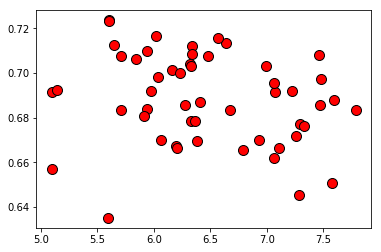

In [95]:
fig,    ax = plt.subplots() 
ax.errorbar(MusicHappinessDF['Life Ladder'], MusicHappinessDF["danceability"],  fmt="o",color= 'r'
               ,linewidth=0, markeredgecolor='black',markeredgewidth=1,markersize=10,label='label')
plt.xlabel('Happiness Index')
plt.ylabel('Music Danceability')
plt.title("How danceable is the music of choice vs the coutnry happiness")
plt.show()

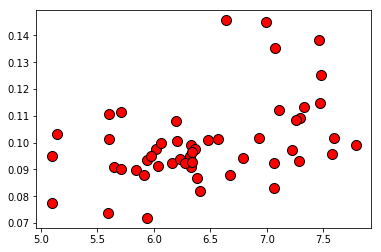

In [96]:
fig,    ax = plt.subplots() 
ax.errorbar(MusicHappinessDF['Life Ladder'], MusicHappinessDF["speechiness"],  fmt="o",color= 'r'
               ,linewidth=0, markeredgecolor='black',markeredgewidth=1,markersize=10,label='label')

plt.xlabel('Happiness Index')
plt.ylabel('Music speechiness')
plt.title("How Wordy is the music of choice vs the coutnry happiness")
plt.show()

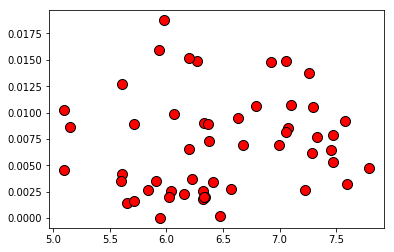

In [97]:
fig,    ax = plt.subplots() 
ax.errorbar(MusicHappinessDF['Life Ladder'], MusicHappinessDF["instrumentalness"],  fmt="o",color= 'r'
               ,linewidth=0, markeredgecolor='black',markeredgewidth=1,markersize=10,label='label')
plt.xlabel('Happiness Index')
plt.ylabel('Music instrumentalness')
plt.title("How instrumental is the music of choice vs the coutnry happiness")
plt.show()

,happiness,energy,danceability,speechiness
Category,,,,
,0.451718,0.602584,0.703109,0.145163


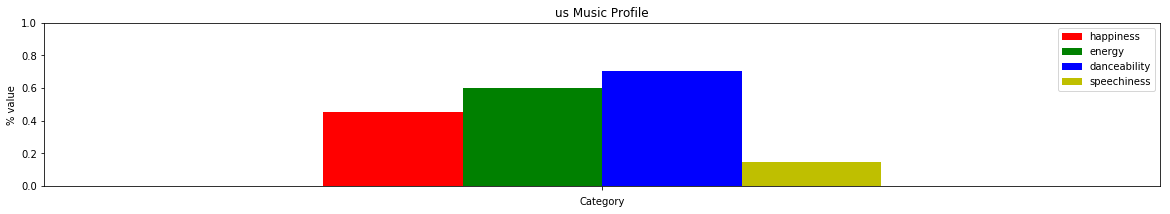

In [159]:
country='us'

CountryMusicProfileDF=MusicHappinessDF.loc[MusicHappinessDF["region"]==country,:]
CountryMusicProfileDF = CountryMusicProfileDF[["happiness", "energy", "danceability" ,"speechiness" ]]
CountryMusicProfileDF["Category"]=""
CountryMusicProfileDF=CountryMusicProfileDF.set_index("Category")

graph=CountryMusicProfileDF.plot(kind="bar", figsize=(20,3), color=['r','g','b','y'] )
plt.ylabel('% value')
plt.title(country +' Music Profile')
plt.ylim(0,1)


CountryMusicProfileDF.head()

#NewDataframe = YourDataFrame.reset_index(drop=True)

In [118]:
# Can I find a song with this profile?

happinessHigh=int((CountryMusicProfileDF["happiness"]+.03)*100)/100
happinessLow=int((CountryMusicProfileDF["happiness"]-.03)*100)/100


energyHigh=int((CountryMusicProfileDF["energy"]+.03)*100)/100
energyLow=int((CountryMusicProfileDF["energy"]-.03)*100)/100



danceabilityHigh=int((CountryMusicProfileDF["danceability"]+.03)*100)/100
danceabilityLow=int((CountryMusicProfileDF["danceability"]-.03)*100)/100



speechinessHigh=int((CountryMusicProfileDF["speechiness"]+.03)*100)/100
speechinessLow=int((CountryMusicProfileDF["speechiness"]-.03)*100)/100



FindSong=RawSpotifyData.loc[(RawSpotifyData["happiness"]>happinessLow) 
                            &(RawSpotifyData["happiness"]<happinessHigh) 
                            &(RawSpotifyData["energy"]>energyLow) 
                            &(RawSpotifyData["energy"]<energyHigh) 
                            &(RawSpotifyData["danceability"]>danceabilityLow) 
                            &(RawSpotifyData["danceability"]<danceabilityHigh) 
                            &(RawSpotifyData["speechiness"]>speechinessLow) 
                            &(RawSpotifyData["speechiness"]<speechinessHigh) 
                            
                            
                            
                            
                            
                            
                            ,:] #0.645
FindSong

,Position,Track Name,Artist,Streams,date,region,id,uri,happiness,energy,danceability,loudness,speechiness,instrumentalness
13957,155,Because I Love You,Chef'Special,20194,3/3/2017,nl,2BCLBZfNk1n4URI8lKEpQV,spotify:track:2BCLBZfNk1n4URI8lKEpQV,0.508,0.688,0.654,-5.695,0.0964,0.000000
30416,15,Habibi,Ghali,100218,11/24/2017,it,1lwpe8mLgHhytakM7m6R3W,spotify:track:1lwpe8mLgHhytakM7m6R3W,0.523,0.711,0.649,-6.924,0.1030,0.000003
32896,26,Habibi,Ghali,70710,9/1/2017,it,1lwpe8mLgHhytakM7m6R3W,spotify:track:1lwpe8mLgHhytakM7m6R3W,0.523,0.711,0.649,-6.924,0.1030,0.000003
40555,69,Habibi,Ghali,35335,7/7/2017,it,1lwpe8mLgHhytakM7m6R3W,spotify:track:1lwpe8mLgHhytakM7m6R3W,0.523,0.711,0.649,-6.924,0.1030,0.000003


In [77]:
CountryMusicProfileDF

,region,Position,Streams,happiness,energy,danceability,loudness,speechiness,instrumentalness,COUNTRY,...,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
50,us,100.5,380952.54125,0.451718,0.602584,0.703109,-6.670432,0.145163,0.006894,United States,...,0.826555,0.268269,0.386535,NaN,NaN,1.880688,0.268986,NaN,0.4068,0.610804
